In [40]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


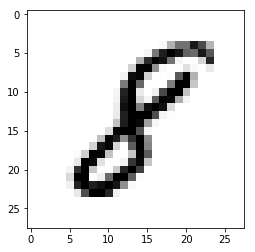

In [43]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 49s 823us/step - loss: 0.2065 - acc: 0.9385
Epoch 2/10
60000/60000 [==============================] - 48s 797us/step - loss: 0.0826 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0574 - acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.0421 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 46s 768us/step - loss: 0.0350 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 49s 816us/step - loss: 0.0289 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 49s 817us/step - loss: 0.0248 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 49s 820us/step - loss: 0.0215 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 49s 825us/step - loss: 0.0191 - acc: 0.9931
Epoch 10/10
60000/60000 [=========

In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 198us/step


[0.06660660633829975, 0.9827]

3


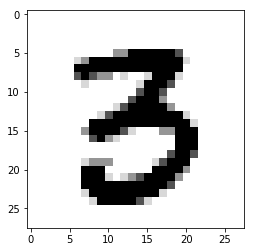

In [27]:
#image_index = 4444
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

8


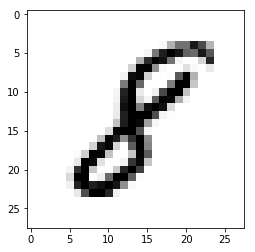

In [32]:
#image_index = 4444
image_index = 7777
plt.imshow(x_train[image_index].reshape(28, 28),cmap='Greys')

pred = model.predict(x_train[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())